In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data_cleaned.csv")
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.531137,2.464751,4.000000,2.806495,3.000000,2.751185,2.634538,2.900757,2.699125,2.906070,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.537720,2.471333,1.500000,2.809467,2.844302,2.754097,2.637355,2.902445,2.701536,2.907452,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.640666,2.574498,3.131971,2.909512,2.943809,2.853692,2.736682,3.000671,2.800051,3.004852,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.476686,2.412456,2.000000,2.745456,3.000000,2.691836,2.575730,2.839953,2.640844,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.389385,2.326110,3.500000,2.657135,0.500000,2.604037,0.500000,1.000000,2.553916,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,3.012475,2.997849,3.158353,3.039100,3.500000,3.050289,2.987122,3.089079,3.025997,3.074744,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.000000,4.000000,3.431464,3.312056,4.000000,4.000000,2.500000,3.363354,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,3.007248,2.992744,3.153440,3.034333,3.033142,3.044939,2.981893,3.500000,3.021248,3.070068,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,3.077890,3.062803,3.222826,3.103411,3.101700,3.112978,3.049472,3.151022,3.087521,3.135828,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [53]:
df.columns[401:]

Index(['I enjoy driving fast', 'I enjoy rollercoasters ',
       'Have you ever bungee-jumped?', 'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?', 'Have you gambled or bet for money?',
       'Have you ever been sky-diving?', 'Is talkative',
       'Tends to find fault with others', 'Does a thorough job',
       'Is depressed/Blue', 'Is o

In [19]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'user_id'}, inplace=True)

In [6]:
df.iloc[0,:400].index

Index(['The Life of David Gale (2003)', 'Wing Commander (1999)',
       'Django Unchained (2012)', 'Alien (1979)',
       'Indiana Jones and the Last Crusade (1989)', 'Snatch (2000)',
       'Rambo: First Blood Part II (1985)', 'Fargo (1996)',
       'Let the Right One In (2008)', 'Black Swan (2010)',
       ...
       'X-Men 2 (2003)', 'The Usual Suspects (1995)', 'The Mask (1994)',
       'Jaws (1975)', 'Harry Potter and the Chamber of Secrets (2002)',
       'Patton (1970)', 'Anaconda (1997)', 'Twister (1996)',
       'MacArthur (1977)', 'Look Who's Talking (1989)'],
      dtype='object', length=400)

In [20]:
df.iloc[1093]

user_id                                                                    1093.000000
The Life of David Gale (2003)                                                 3.000000
Wing Commander (1999)                                                         4.000000
Django Unchained (2012)                                                       3.431464
Alien (1979)                                                                  3.312056
                                                                              ...     
Movies change my position on social economic or political issues              6.000000
When watching movies things get so intense that I have to stop watching       5.000000
Gender identity (1 = female; 2 = male; 3 = self-described)                    1.000000
Are you an only child? (1: Yes; 0: No; -1: Did not respond)                   0.000000
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)            0.000000
Name: 1093, Length: 478, dtype: float64

In [44]:
df[['The Life of David Gale (2003)']]

,The Life of David Gale (2003)
0,2.531137
1,2.537720
2,2.640666
3,2.476686
4,2.389385
...,...
1092,3.012475
1093,3.000000
1094,3.007248
1095,3.077890


## Q1

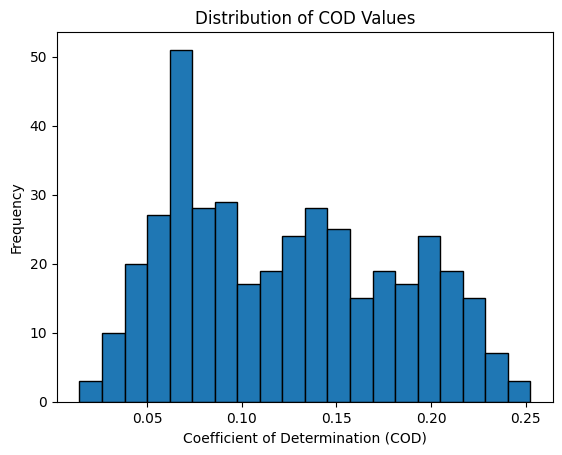

                      Movie ID             Best Predictor       COD
208                I.Q. (1994)     Erik the Viking (1989)  0.672159
203     Erik the Viking (1989)                I.Q. (1994)  0.672159
287  The Straight Story (1999)               Congo (1995)  0.663001
282               Congo (1995)  The Straight Story (1999)  0.663001
377         The Lookout (2007)              Patton (1970)  0.645374
395              Patton (1970)         The Lookout (2007)  0.645374
300                 Ran (1985)       Heavy Traffic (1973)  0.641827
309       Heavy Traffic (1973)                 Ran (1985)  0.641827
369   The Station Agent (2003)             Ed Wood (1994)  0.637398
326             Ed Wood (1994)   The Station Agent (2003)  0.637398
                           Movie ID  \
80                    Avatar (2009)   
95              Interstellar (2014)   
319               La La Land (2016)   
9                 Black Swan (2010)   
190   The Cabin in the Woods (2012)   
248              G

In [46]:


# Assuming you have a DataFrame 'df' with columns: 'movie_id', 'user_id', 'rating'

# Placeholder for storing COD values
cod_values = []

# Placeholder for storing the best predictor for each movie
best_predictors = []

# Iterate over each movie
for movie in df.columns[1:401].unique():
    # Select data for the current movie
    current_movie_data = df[[movie]]

    # Placeholder for storing COD values for the current movie
    movie_cod_values = []

    # Placeholder for storing best predictor for the current movie
    best_predictor = None
    best_cod = 0

    # Iterate over all other movies to build 399 models
    for other_movie in df.columns[1:401].unique():
        if other_movie != movie:
            # Select data for the other movie
            other_movie_data = df[[other_movie]]

            # Extract X and y
            X = other_movie_data
            y = current_movie_data

            # Fit a linear regression model
            model = LinearRegression()
            model.fit(X, y)

            # Predict ratings
            predictions = model.predict(X)

            # Calculate COD
            cod = r2_score(y, predictions)

            # Check if this model is the best predictor
            if cod > best_cod:
                best_cod = cod
                best_predictor = other_movie

            movie_cod_values.append(cod)

    # Calculate the average COD for the current movie
    avg_cod = sum(movie_cod_values) / len(movie_cod_values)
    cod_values.append(avg_cod)

    # Store the best predictor for the current movie
    best_predictors.append((movie, best_predictor, best_cod))

# Plot histogram
plt.hist(cod_values, bins=20, edgecolor='black')
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('Frequency')
plt.title('Distribution of COD Values')
plt.show()

# Display the table of best and worst predictors
best_predictors_df = pd.DataFrame(best_predictors, columns=['Movie ID', 'Best Predictor', 'COD'])
print(best_predictors_df.sort_values(by='COD', ascending=False).head(10))
print(best_predictors_df.sort_values(by='COD').head(10))


## Q2

Now we'll be focusing on the top and bottom 10 movies and using mutliple regression to analyse further

In [58]:
bottom_10 = best_predictors_df.sort_values(by='COD').head(10)
top_10 = best_predictors_df.sort_values(by='COD', ascending=False).head(10)

In [62]:
bottom_10['Movie ID'].values

array(['Avatar (2009)', 'Interstellar (2014)', 'La La Land (2016)',
       'Black Swan (2010)', 'The Cabin in the Woods (2012)',
       'Grown Ups 2 (2013)', 'Clueless (1995)',
       'The Wolf of Wall Street (2013)', 'Planet of the Apes (2001)',
       'Shutter Island (2010)'], dtype=object)

In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns: 'movie_id', 'user_id', 'rating', and additional predictors

# Placeholder for storing COD values
cod_values = []

# Placeholder for storing R^2 values for the new multiple regression models
r2_values = []

# Placeholder for storing the best predictor for each movie
best_predictors = []

# Iterate over each movie
for movie in bottom_10['Movie ID'].unique():
    # Select data for the current movie
    current_movie_data = df[movie]

    # Placeholder for storing COD values for the current movie
    movie_cod_values = []

    # Placeholder for storing R^2 values for the new multiple regression models
    movie_r2_values = []

    # Placeholder for storing best predictor for the current movie
    best_predictor = None
    best_cod = 0

    # Iterate over all other movies to build 399 models
    for other_movie in bottom_10['Movie ID'].unique():
        if other_movie != movie:
            # Select data for the other movie
            other_movie_data = df[other_movie]

#             # Merge the two datasets on 'user_id'
#             merged_data = pd.merge(current_movie_data, other_movie_data, on='user_id', suffixes=('_current', '_other'))

            # Extract additional predictors
            X_additional = df[['Gender identity (1 = female; 2 = male; 3 = self-described)', 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)', 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]
            
            # Extract X and y
            X = other_movie_data
            y = current_movie_data

            # Fit a multiple regression model
            model = LinearRegression()
            X_combined = pd.concat([X, X_additional], axis=1)
            model.fit(X_combined, y)

            # Predict ratings
            predictions = model.predict(X_combined)

            # Calculate R^2
            r2 = r2_score(y, predictions)

            # Check if this model is the best predictor
            if r2 > best_cod:
                best_cod = r2
                best_predictor = other_movie

            movie_r2_values.append(r2)
            movie_cod_values.append(cod)

    # Calculate the average COD for the current movie
    avg_cod = sum(movie_cod_values) / len(movie_cod_values)
    cod_values.append(avg_cod)

    # Calculate the average R^2 for the new multiple regression models
    avg_r2 = sum(movie_r2_values) / len(movie_r2_values)
    r2_values.append(avg_r2)

    # Store the best predictor for the current movie
    best_predictors.append((movie_id, best_predictor, best_cod))

# Plot scatterplot
plt.scatter(cod_values, r2_values, alpha=0.5)
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('R^2 for Multiple Regression Models')
plt.title('Scatterplot of COD vs R^2')
plt.show()

# Display the table of best and worst predictors
best_predictors_df = pd.DataFrame(best_predictors, columns=['Movie ID', 'Best Predictor', 'R^2'])

print(best_predictors_df.sort_values(by='R^2', ascending=False).head(10))
print(best_predictors_df.sort_values(by='R^2').head(10))



ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [76]:
additional_predictors = df[['Gender identity (1 = female; 2 = male; 3 = self-described)', 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)', 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]

In [79]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns: 'movie_id', 'user_id', 'rating', 'gender_identity', 'sibship_status', 'social_viewing_preferences'

# Placeholder for storing old COD values
old_cod_values = []

# Placeholder for storing new R² values
new_r2_values = []

# Placeholder for storing information about the models
model_info = []

# Iterate over the best and least well-predicted movies
for _, row in best_predictors_df.sort_values(by='COD').head(10).iterrows():
    movie_id = row['Movie ID']
    best_predictor = row['Best Predictor']

    # Select data for the current movie
    current_movie_data = df[movie_id]

    # Select data for the best predictor movie
    best_predictor_data = df[best_predictor]

    # Merge the two datasets on 'user_id'
    merged_data_ = pd.merge(current_movie_data, best_predictor_data,left_index=True, right_index=True, suffixes=('_current', '_other'))
    merged_data = pd.merge(merged_data_, additional_predictors,left_index=True, right_index=True)

    # Extract X and y
    X = df[['Gender identity (1 = female; 2 = male; 3 = self-described)', 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)', 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]
    y = merged_data[movie_id]

    # Fit a multiple regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict ratings
    predictions = model.predict(X)

    # Calculate R²
    r2 = r2_score(y, predictions)

    # Store information about the model
    model_info.append({'Movie ID': movie_id, 'Best Predictor': best_predictor, 'R²': r2})

    # Store old COD value
    old_cod_values.append(row['COD'])

    # Store new R² value
    new_r2_values.append(r2)

# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=old_cod_values, y=new_r2_values)
plt.xlabel('Old COD (Simple Linear Regression)')
plt.ylabel('New R² (Multiple Regression)')
plt.title('Comparison of Old COD and New R²')
plt.show()

# Display information about the models
model_info_df = pd.DataFrame(model_info)
print(model_info_df)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [78]:
merged_data

,Avatar (2009),Pirates of the Caribbean: Dead Man's Chest (2006),Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,3.500000,0.500000,1.0,0,1
1,1.500000,1.500000,1.0,0,0
2,3.000000,3.000000,1.0,1,0
3,2.783891,2.000000,1.0,0,1
4,3.500000,2.000000,1.0,1,1
...,...,...,...,...,...
1092,3.000000,2.989225,1.0,0,0
1093,4.000000,3.500000,1.0,0,0
1094,4.000000,2.500000,1.0,0,0
1095,3.000000,3.031207,1.0,0,1


In [67]:
 best_predictor_data

0       0.500000
1       1.500000
2       3.000000
3       2.000000
4       2.000000
          ...   
1092    2.989225
1093    3.500000
1094    2.500000
1095    3.031207
1096    2.939510
Name: Pirates of the Caribbean: Dead Man's Chest (2006), Length: 1097, dtype: float64